<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [390]:
import matplotlib.pyplot as plt

% matplotlib inline

In [391]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [392]:
X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [393]:
boston = pd.concat([y, X], axis=1)

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [394]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

In [395]:
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [396]:
#print shape
boston.shape

(506, 14)

In [397]:
boston.isnull().sum()
#total nulls = 0

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [398]:
# data types all floats
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [487]:
# printing out of descriptive statistcics for boston numerical data
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
You **must** justify the choice of your predictors. Score and plot your predictions. What do these results tell us?

In [488]:
import seaborn as sns 

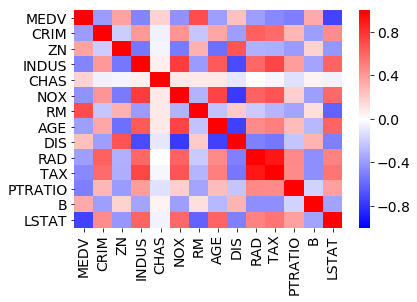

In [489]:
sns.heatmap(boston.corr(), cmap='bwr', vmin=-1)

In [490]:
# the three predictors for MEDV will be RM (Rooms), ZN (Zone), DIS (weighted distances to 5 employment centers)
# these also are three factors that must be considered when buying a home, number of rooms, is the area resedential
# or not, and lastly poriximity to employment oppurtunities. These are all factors that must be considered, so it 
# is no suprise that they were positively correlated with MEDV

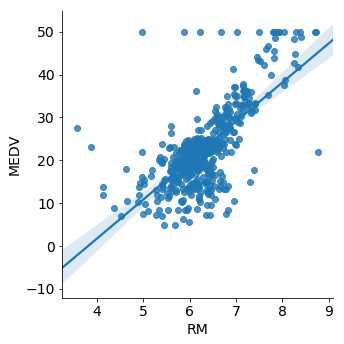

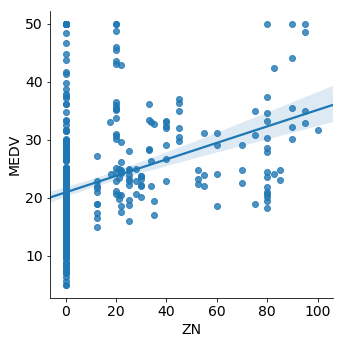

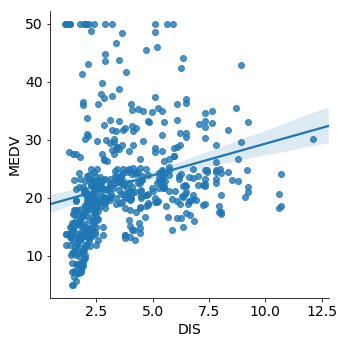

In [491]:
sns.lmplot(x='RM', y='MEDV', data=boston)
plt.show()
sns.lmplot(x='ZN', y='MEDV', data=boston)
plt.show()
sns.lmplot(x='DIS', y='MEDV', data=boston)
plt.show()

In [492]:
#each of these predictors are positively correlated, but not all of them are as strong. Rooms being the strongest 
#correlated, ZN being second strongest (although fairly weak), DIS is least correlated and it very weak
predictors = ['RM', 'ZN', 'DIS']
X = boston[predictors]
y = boston.MEDV

In [493]:
from sklearn.linear_model import LinearRegression

In [494]:
lr = LinearRegression()
lr.fit(X, y)

lr.predict(X)

array([25.39392248, 23.14378732, 29.60226267, 28.12220544, 29.38177721,
       23.32061644, 20.4554719 , 21.84391162, 17.28267417, 20.48274959,
       23.6133293 , 20.49140083, 19.40560815, 19.12985167, 20.34992159,
       18.13848047, 18.99228415, 19.4350827 , 14.87846463, 17.16936361,
       15.84229263, 19.20115031, 20.69416337, 17.92384472, 18.89018778,
       16.14785962, 17.97782947, 19.93491801, 23.7222064 , 25.21553913,
       17.09117195, 20.12064316, 19.07229622, 16.94871698, 20.28532941,
       18.87065521, 18.09455222, 18.22181252, 19.19442405, 28.94207318,
       32.56862543, 26.16340794, 21.08285338, 21.43790046, 20.23750321,
       16.90891293, 17.78807711, 19.90491868, 14.58737401, 16.32346295,
       20.6425458 , 21.92747806, 25.27506476, 20.93841836, 23.14195584,
       35.63133437, 28.06994318, 32.50842294, 22.50175482, 20.57767512,
       19.03231616, 20.89691985, 25.07657912, 27.73284636, 30.30946124,
       26.76094012, 22.50882874, 19.4089513 , 17.0081568 , 19.46

In [495]:
y_preds = lr.predict(X)

In [496]:
from sklearn import metrics

In [497]:
# printing the training RMSE for the model created 
# evaluating model based on the same data we used to train model.
# the model is likely overfit because it was trained on the same data it was tested on 
print(np.sqrt(metrics.mean_squared_error(y, y_preds)))

6.4539751870294175


In [498]:
print(lr.score(X, y))
print(lr.intercept_)
print(list(zip(predictors, lr.coef_)))

0.5065859427436799
-31.593113442437836
[('RM', 8.453501760162915), ('ZN', 0.057165989091515594), ('DIS', 0.09199854320836433)]


#### MEDV = -31.6 + 8.45(RM) + 0.057(ZN) + 0.092(DIS)
#### intercept is at -31.6, which means when a RM, ZN, and DIS are 0 the MEDV is -31.6. However this is home value so a home value should never be negative 
#### For every 1 unit Room (RM) increase in a Boston home, the MEDV value increases by a factor of 8.45, while holding all other variables as constant 
#### For every 1 unit increase in Zone (ZN) for a Boston home, the MEDV value increases by a factor of 0.057, while holding all other variables as constant 
#### For every 1 unit increase in DIS (distance to 5 boston emploment centers) for a Boston home, the MEDV value increases by a factor of 0.092, while holding all other variables as constant 

In [499]:
#calculating NULL RMSE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a y null which is a NumPy array that will have the same shape/length as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# code below is filling y null with mean from y test, then array is printing
y_null.fill(y_test.mean())
y_null

array([22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77401575,
       22.77401575, 22.77401575, 22.77401575, 22.77401575, 22.77

In [500]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

8.884944468283209

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [501]:
from sklearn.model_selection import train_test_split

In [502]:
# function that takes in features from boston data, train size, and test size, and outputs the RMSE
def tt_splitCompare(df, features, test, train, randomState):
    X = df[features]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, train_size=train, random_state=randomState)
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    yhat = lr.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [503]:
# function that takes in features from boston data, train size, and test size, and outputs the R2 score
def tt_splitCompareR2(df, features, test, train, randomState):
    X = df[features]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, train_size=train, random_state=randomState)
    
    lr.fit(X_train, y_train)
    rsq = lr.score(X_test, y_test)
    
    return rsq

In [505]:
# function that takes in features from boston data, train size, and test size, and outputs a joint plot 
# with y_test MEDV data, and yhat which is the MEDV prediction from the X test split
def tt_splitComparePlot(df, features, test, train, randomState):
    X = df[features]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, train_size=train, random_state=randomState)
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    yhat = lr.predict(X_test)
    return sns.jointplot(y_test, yhat);

RMSE: 
6.877620637559164
R-Squared: 
0.4008066314048657


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


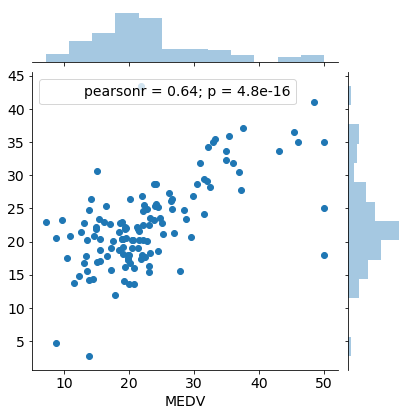

In [506]:
# Compare the two different train/test splits 
print('RMSE: ')
print(tt_splitCompare(boston, ['RM', 'ZN', 'DIS'], None, None, 123))
print('R-Squared: ')
print(tt_splitCompareR2(boston, ['RM', 'ZN', 'DIS'], None, None, 123))
tt_splitComparePlot(boston, ['RM', 'ZN', 'DIS'], None, None, 123);

RMSE: 
7.375014239140228
R-Squared: 
0.32708005469256474


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


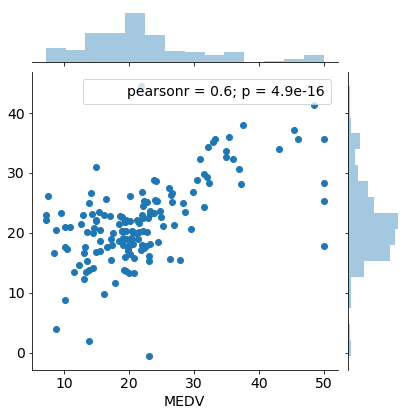

In [507]:
print('RMSE: ')
print(tt_splitCompare(boston, ['RM', 'ZN', 'DIS'], 0.3, 0.7, 123))
print('R-Squared: ')
print(tt_splitCompareR2(boston, ['RM', 'ZN', 'DIS'], 0.3, 0.7, 123))
tt_splitComparePlot(boston, ['RM', 'ZN', 'DIS'], 0.3, 0.7, 123);

RMSE: 
8.874214016554623
R-Squared: 
0.3111909905140322


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


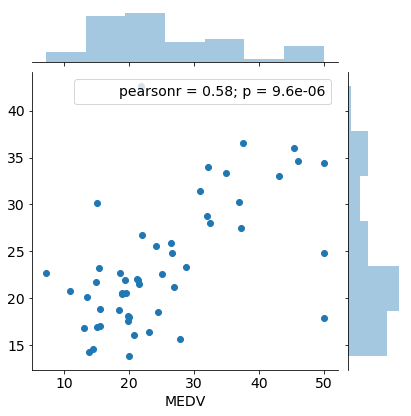

In [508]:
print('RMSE: ')
print(tt_splitCompare(boston, ['RM', 'ZN', 'DIS'], 0.1, 0.9, 123))
print('R-Squared: ')
print(tt_splitCompareR2(boston, ['RM', 'ZN', 'DIS'], 0.1, 0.9, 123))
tt_splitComparePlot(boston, ['RM', 'ZN', 'DIS'], 0.1, 0.9, 123);

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [509]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [513]:
#function that will run k fold cross validation, where # of folds is the function input
#

def CV_foldTest(folds):
    CVscores = cross_val_score(lr, X, y, cv=folds)
    
    print("Cross-validated scores: {}".format(CVscores))
    print("Mean Cross-validated R2: {}".format(np.mean(CVscores)))
    print('Std Cross-validated R2: {}'.format(np.std(CVscores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(lr, X[predictors], y, cv=folds)
    # calculate rsquared with the cross validated predictions
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))
    

In [514]:
CV_foldTest(5)

Cross-validated scores: [ 0.69636231  0.61903785  0.50149366 -0.19361097 -1.74396334]
Mean Cross-validated R2: -0.02413609768194096
Std Cross-validated R2: 0.9160354586223617
Cross-Predicted R2: 0.37851537463498164


In [515]:
CV_foldTest(6)

Cross-validated scores: [ 0.64089761  0.66123984  0.48205833  0.69566562 -0.39180391 -1.64140143]
Mean Cross-validated R2: 0.07444267817718046
Std Cross-validated R2: 0.8542811253421092
Cross-Predicted R2: 0.4030043636653854


In [516]:
CV_foldTest(7)

Cross-validated scores: [ 0.63931836  0.73396926  0.44318608  0.50781964  0.54601978 -0.63088875
 -1.16514805]
Mean Cross-validated R2: 0.1534680460389388
Std Cross-validated R2: 0.6856274099667712
Cross-Predicted R2: 0.3915923442268976


In [517]:
CV_foldTest(8)

Cross-validated scores: [ 0.63892634  0.77080462  0.54048344  0.6936605   0.63014693 -0.79907405
 -3.82679128 -0.89319118]
Mean Cross-validated R2: -0.2806293347047589
Std Cross-validated R2: 1.4842236073246706
Cross-Predicted R2: 0.3977584712385265


In [518]:
CV_foldTest(9)

Cross-validated scores: [ 0.63224533  0.75962214  0.63068693  0.44740504  0.55845727  0.74949113
 -0.45777204 -4.41473862 -0.56432898]
Mean Cross-validated R2: -0.18432575546544924
Std Cross-validated R2: 1.5691634143263706
Cross-Predicted R2: 0.40127744020395006


In [519]:
CV_foldTest(10)

Cross-validated scores: [ 0.60067921  0.74684756 -0.25671121  0.33249138  0.67059791  0.53540744
  0.45767581 -0.36439467 -4.84915065  0.12493639]
Mean Cross-validated R2: -0.20016208286116627
Std Cross-validated R2: 1.5906880193028299
Cross-Predicted R2: 0.42043382434078636


In [520]:
CV_foldTest(11)

Cross-validated scores: [ 0.60231388  0.68470601  0.76589093  0.54191802  0.51356208  0.68977784
  0.70203218 -3.49457964 -0.06528996 -9.68231496  0.19123746]
Mean Cross-validated R2: -0.7773405613214311
Std Cross-validated R2: 3.0495537627771703
Cross-Predicted R2: 0.43537464126155667


In [521]:
CV_foldTest(12)

Cross-validated scores: [ 0.60773861  0.68705333  0.80488233  0.63209639  0.41970066  0.66169826
  0.52576021  0.72643591 -0.86583442 -2.33167924 -8.1389999   0.33844392]
Mean Cross-validated R2: -0.49439199395018435
Std Cross-validated R2: 2.4650570588530107
Cross-Predicted R2: 0.41726900007578094


In [522]:
### the lowest of the cross predicted R2 scores is 0.378 with the folds at 5, the highest of the cross predicted r2 out 
### of these tests is 0.435 with the folds at 11. 
### 10 folds produces the second highest cross validated r2.
#### the cross validated r squares increase until 11, however there is a slight spike when the number of folds is 
### at 6, .403. then goes back down 0.39 when folds is 7

### 11 might give us the best score 

# KNN Practice

In [523]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [524]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [525]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [526]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['Iris_species'] = iris.species.map({'Iris-setosa':0,
                                        'Iris-versicolor':1,
                                        'Iris-virginica':2})

In [527]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [528]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
Iris_species      int64
dtype: object

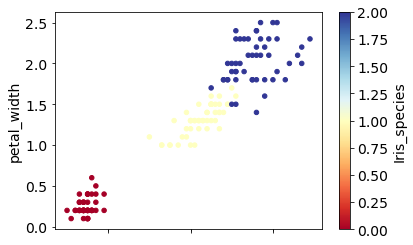

In [531]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='Iris_species', colormap='RdYlBu');

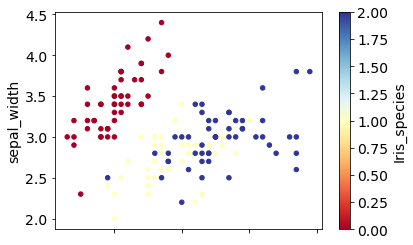

In [532]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='Iris_species', colormap='RdYlBu');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [533]:
features = ['petal_width', 'petal_length']
X = iris[features]

### Create your target vector "y"
This will be the species type.

In [534]:
y = iris.Iris_species

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [536]:
from sklearn.neighbors import KNeighborsClassifier

In [538]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [539]:
y_predictions = knn.predict(X_test)

In [540]:
y_predictions

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1])

In [541]:
print((metrics.accuracy_score(y_test, y_predictions)))

0.9736842105263158


### Create a Model With Five Neighbors. Did it Improve?

In [542]:
knnFive = KNeighborsClassifier(n_neighbors=5)
knnFive.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [543]:
y_preds = knnFive.predict(X_test)

In [544]:
print((metrics.accuracy_score(y_test, y_preds)))

0.9736842105263158


In [ ]:
# model rsq ended up being the same for the two differnt numbers of folds

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [480]:
KnnScores = []
for k in range(1, 50):
    knnloop = KNeighborsClassifier(n_neighbors=k)
    knnloop.fit(X_train,y_train)
    score = knnloop.score(X_test, y_test)
    KnnScores.append([k, score])

In [482]:
Scoredata = pd.DataFrame(KnnScores,columns=['k','score'])

In [484]:
Scoredata.sort_values('score', ascending=False)

,k,score
20,21,1.000000
19,20,1.000000
18,19,1.000000
17,18,1.000000
16,17,1.000000
14,15,1.000000
10,11,1.000000
0,1,0.973684
38,39,0.973684
27,28,0.973684


### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [485]:
## knn.predict_proba(X_new) will return the probability estimates for the test data X_new

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [486]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [ ]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))